4.943755299006494
1.1532531756323319
1.0000150000398844
-0.35017548837401463
0.4973637525353891
0.5402980985058647
40.0
4.641000000000004
4.0000600004308495


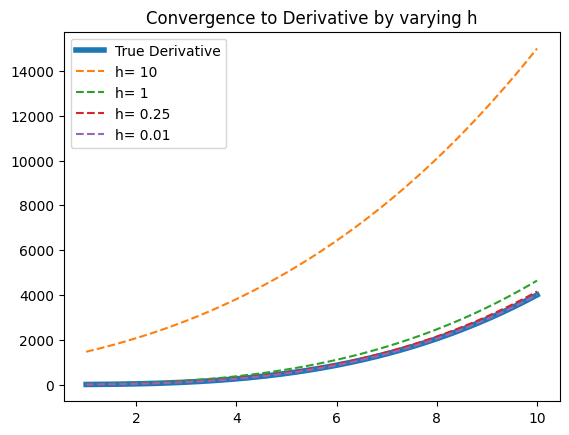

In [4]:
import numpy as np
from math import sin, cos, log, pi
import matplotlib.pyplot as plt

def limit_derivative(f, x, h):
    """ f: function to be differentiated x: the point at which to differentiate f 
h: distance between the points to be evaluated"""
# compute the derivative at x with limit definition
    return (f(x+h) - f(x)) / h

# f1(x) = sin(x)
def f1(x):
    return sin(x)

# f2(x) = x^4
def f2(x):
    return pow(x, 4)

# f3(x) = x^2*log(x)
def f3(x):
    return pow(x, 2) * log(x)

# Calculate derivatives here
print(limit_derivative(f3, 1, 2))
print(limit_derivative(f3, 1, 0.1))
print(limit_derivative(f3, 1, 0.00001))

print(limit_derivative(f1, 1, 2))
print(limit_derivative(f1, 1, 0.1))
print(limit_derivative(f1, 1, 0.00001))

print(limit_derivative(f2, 1, 2))
print(limit_derivative(f2, 1, 0.1))
print(limit_derivative(f2, 1, 0.00001))

# Graph the true derivative
x_vals = np.linspace(1, 10, 200)
y_vals = [4*pow(val, 3) for val in x_vals]
plt.figure(1)
plt.plot(x_vals, y_vals, label="True Derivative", linewidth=4)

# plot different approximated derivatives of f using limit definition of derivative
def plot_approx_deriv(f):
    x_vals = np.linspace(1, 10, 200)
    h_vals = [10, 1, .25, .01]

    for h in h_vals:
        derivative_values = [limit_derivative(f, x, h) for x in x_vals]
        plt.plot(x_vals, derivative_values, linestyle='--', label=f"h= {h}")
    plt.legend()
    plt.title("Convergence to Derivative by varying h")
    plt.show()

# Plot here
#plot_approx_deriv(f1)
plot_approx_deriv(f2)